## Sales_Prediction

In [3]:
import pandas as pd
df=pd.read_csv('sales_prediction.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Prepare training and testing datasets

In [5]:
x=df.drop(columns=['Item_Outlet_Sales','Outlet_Size'])
y=df['Item_Outlet_Sales']
SEED=42

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)
X_train.shape,X_test.shape


((5966, 10), (2557, 10))

In [7]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Tier 3,Supermarket Type3


In [8]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

## EDA 

In [9]:
X_train_c=X_train.copy()

In [10]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Location_Type       5966 non-null   object 
 9   Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 512.7+ KB


In [11]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
num_data = X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [13]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [14]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def visualize_numeric_feature(data_frame,col_name):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    sns.histplot(data=data_frame,x=col_name,ax=ax[0])
    sns.boxplot(data=data_frame,y=col_name,ax=ax[1])

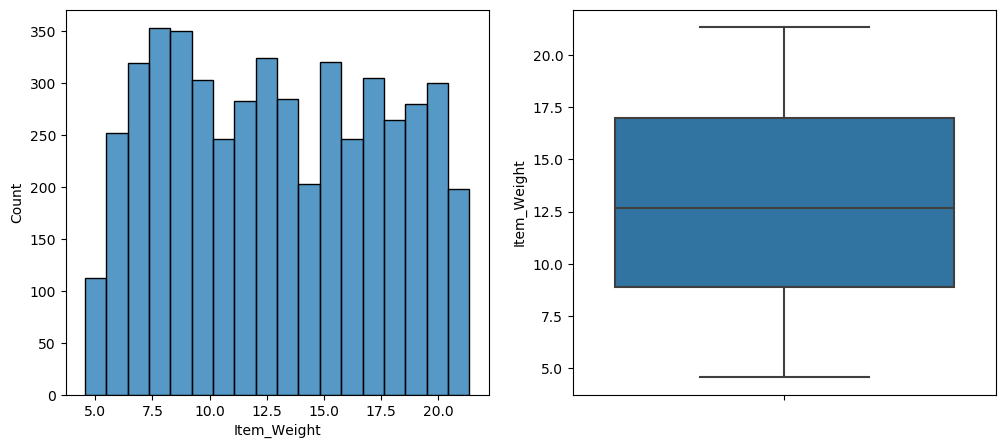

In [17]:
visualize_numeric_feature(X_train_c,'Item_Weight')

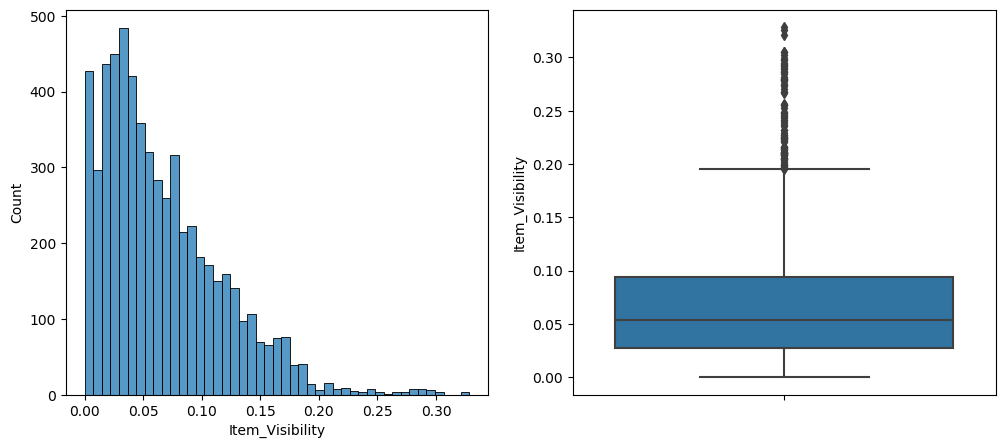

In [18]:
visualize_numeric_feature(X_train_c,'Item_Visibility')

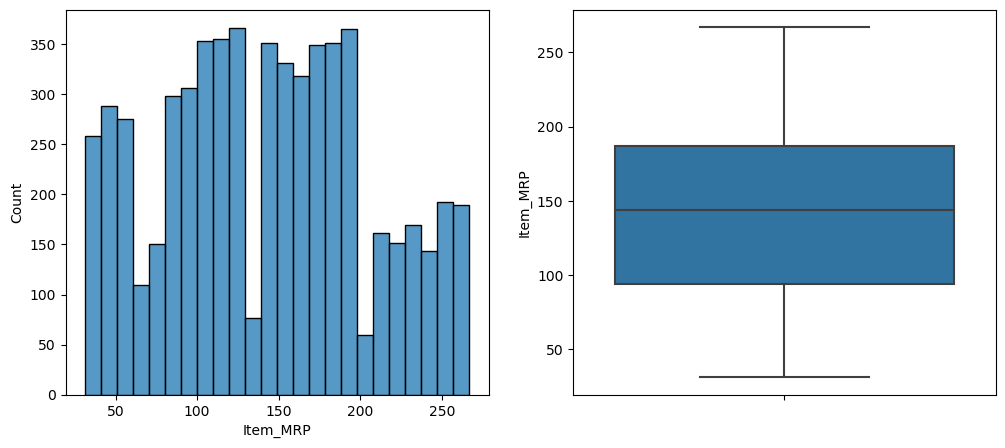

In [19]:
visualize_numeric_feature(X_train_c,'Item_MRP')

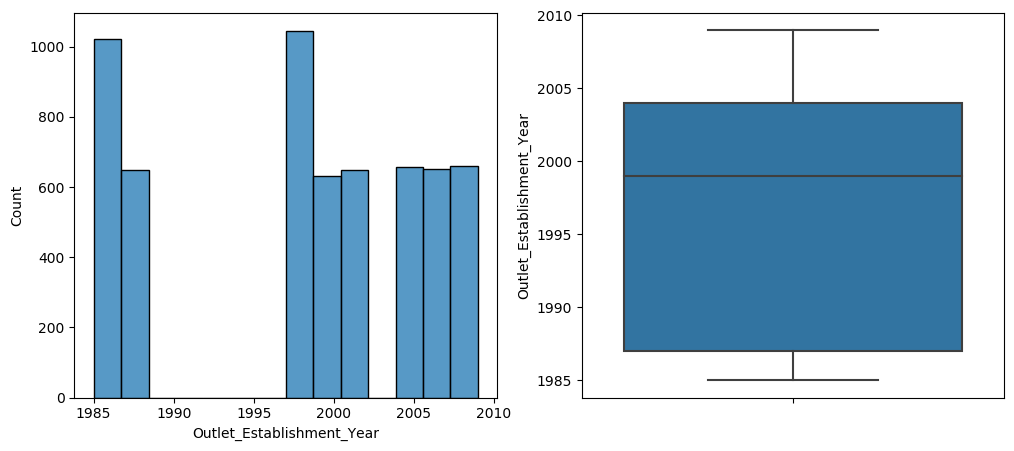

In [20]:
visualize_numeric_feature(X_train_c,'Outlet_Establishment_Year')

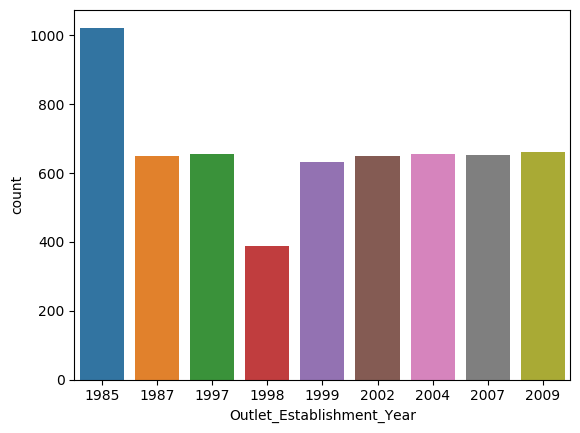

In [21]:
sns.countplot(data=X_train_c,x='Outlet_Establishment_Year')

In [22]:
cat_features = X_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,Tier 3,Supermarket Type1


In [23]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,5966,5966
unique,1543,5,16,10,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Tier 3,Supermarket Type1
freq,9,3535,905,668,2367,3893


In [24]:
cat_features.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [25]:
cat_features['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV09    8
DRJ24    8
DRE49    8
        ..
DRG51    1
NCA18    1
DRE15    1
FDU48    1
FDA57    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [26]:
cat_features['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [27]:
cat_features['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [28]:
cat_features['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT013    649
OUT045    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [29]:
cat_features['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

## Data wrangling + Feature engineering

# Step 1 : create high level data

In [30]:
X_train_c['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [31]:
def create_item_type(data_frame):
    data_frame['Item_Type']=data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type']=data_frame['Item_Type'].map({
                                           'FD':'Food',
                                           'NC':'Non_consumables',
                                           'DR':'Drinks'
    })
    return data_frame

In [32]:
X_train_c=create_item_type(X_train_c)

## Step 2:Missing item_weight

In [33]:
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [34]:
ITEM_ID_WEIGHT_PIVOT=X_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING=dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [35]:
ITEM_TYPE_WEIGHT_PIVOT=X_train_c.pivot_table(values='Item_Weight',index='Item_Type',aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING=dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drinks', 11.8), ('Food', 12.8), ('Non_consumables', 13.05)])

In [36]:
def impute_item_weight(data_frame):
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
    return data_frame

## Step 3:Standardize fat content

In [37]:
def standardize_fat_content(data_frame):
    data_frame['Item_Fat_Content']=data_frame['Item_Fat_Content'].replace({
        'Low Fat':'Low_Fat',
        'LF':'Low_Fat',
        'reg':'Regular',
        'low fat': 'Low_Fat'})
    return data_frame

## Step 4:Correct Item fat content for nonconsumables

In [38]:
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drinks           LF                    31
                 Low Fat              472
                 Regular               42
                 low fat               14
                 reg                    1
Food             LF                   140
                 Low Fat             2017
                 Regular             1985
                 low fat               49
                 reg                   78
Non_consumables  LF                    72
                 Low Fat             1046
                 low fat               19
dtype: int64

In [39]:
def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type']=='Non_consumables','Item_Fat_Content']='Non_Edible'
    return data_frame

## Prepare datasets

In [40]:
def prepare_datasets(data_frame):
    data_frame=create_item_type(data_frame)
    data_frame=impute_item_weight(data_frame)
    data_frame=standardize_fat_content(data_frame)
    data_frame=correct_item_fat_content(data_frame)
    return data_frame

In [41]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [42]:
X_train_c=prepare_datasets(X_train_c)

In [43]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [44]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [45]:
X_test=prepare_datasets(X_test)

In [46]:
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Handling categorical data

In [47]:
cat_feats = X_train_c.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_consumables,OUT046,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,Tier 3,Supermarket Type1


In [48]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [49]:
ohe_feature_names=ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [50]:
num_feats_train=X_train_c.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [51]:
cat_feats_train=X_train_c.select_dtypes(include=['object'])
X_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [52]:
X_train_final=pd.concat([num_feats_train,X_train_cat_ohe],axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [53]:
final_columns=X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [54]:
num_feats_test=X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test=X_test.select_dtypes(include=['object'])
X_test_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_test).toarray(),columns=ohe_feature_names)
X_test_final=pd.concat([num_feats_test,X_test_cat_ohe],axis=1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Modelling

In [55]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
linear=linear_model.LinearRegression()
linear.fit(X_train_final,y_train)
y_preds_lr=linear.predict(X_test_final)
y_preds_lr

array([ 874., 1036., 1348., ..., 1054., 1025., 4517.])

In [56]:
lasso=linear_model.Lasso(alpha=0.5)
lasso.fit(X_train_final,y_train)
y_preds_ls=lasso.predict(X_test_final)
y_preds_ls

array([1347.06384653,  706.52327392,  834.20433556, ..., 1101.68670039,
       2205.30978526, 3873.06306336])

In [57]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_final,y_train)
y_preds_rf=rf.predict(X_test_final)
y_preds_rf

array([ 771.775386,  929.58996 ,  563.559752, ...,  501.034474,
       1636.283396, 4974.75773 ])

In [58]:
from sklearn.metrics import mean_squared_error
mse_linear_reg = mean_squared_error(y_test, y_preds_lr)
mse_ls= mean_squared_error(y_test, y_preds_ls)
mse_rf= mean_squared_error(y_test, y_preds_rf)

In [59]:
MSE=[mse_linear_reg, mse_ls,mse_rf]
Models=pd.DataFrame({'models':["Linear Regression","Random Forest Regressor","Lasso Regressor"],'MSE':MSE})
Models.sort_values(by='MSE', ascending=True)

,models,MSE
2,Lasso Regressor,1.253816e+06
1,Random Forest Regressor,1.254439e+06
0,Linear Regression,1.993808e+19


[1254438.948508352, 1253816.360976691]


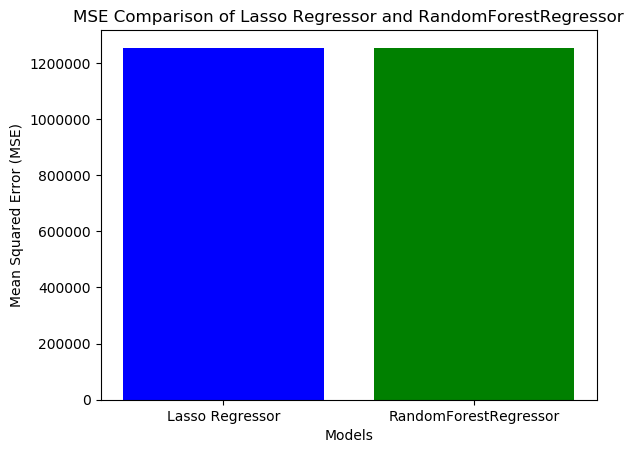

In [60]:
models = ['Lasso Regressor', 'RandomForestRegressor']
mse_values = [mse_ls, mse_rf]

plt.bar(models, mse_values, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of Lasso Regressor and RandomForestRegressor')
print(mse_values)